In [8]:
import numpy as np, curvedsky, prjlib, plottools as pl, tools_y, binning as bn, tools_qrec, pickle
from scipy.signal import savgol_filter
from matplotlib.pyplot import *

In [3]:
mb = bn.multipole_binning(10,lmin=1,lmax=2048)
s = mb.bc**2/2/np.pi

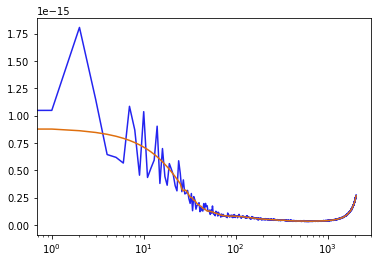

In [9]:
p = prjlib.init_analysis()
cy = tools_y.init_compy(p.ids,masktype=0,ytype='nilc',ascale=1.0)
l, y0, y1, y2, xl = np.loadtxt(cy.fclyy,unpack=True,usecols=(0,1,2,3,4))
yp = savgol_filter(y0, 51, 3)
xscale('log')
plot(l,y0,label='F+L')
plot(l,yp)

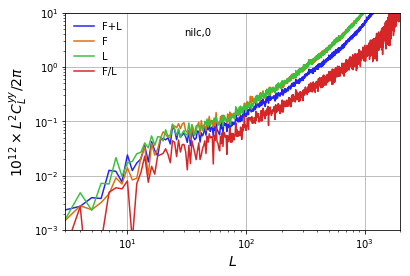

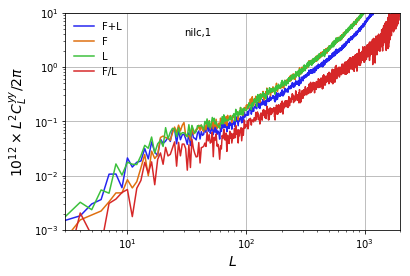

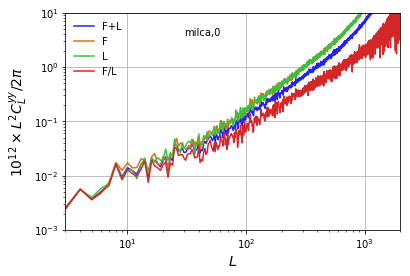

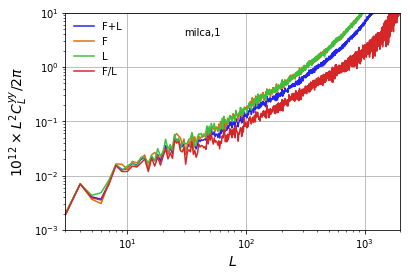

<Figure size 432x288 with 0 Axes>

In [9]:
#cy = {}
for ytype in ['nilc','milca']:
    for mtype in [0,1]:
        p = prjlib.init_analysis()
        cy = tools_y.init_compy(p.ids,masktype=mtype,ytype=ytype,ascale=1.0)
        l, y0, y1, y2, xl = np.loadtxt(cy.fclyy,unpack=True,usecols=(0,1,2,3,4))
        pl.plot_1dstyle(xmin=3,xmax=2000,ymin=1e-3,ymax=10,xlog=True,ylog=True,grid=True,ylab=r'$10^{12}\times L^2C^{yy}_L/2\pi$')
        S = l**2/2/np.pi*1e12
        plot(l,S*y0,label='F+L')
        plot(l,S*y1,label='F')
        plot(l,S*y2,label='L')
        plot(l,S*xl,label='F/L')
        figtext(.4,.8,ytype+','+str(mtype))
        legend()
        show()
        clf()